<a href="https://colab.research.google.com/github/augustoteixeira963/projeto-ciencia-dados-LP/blob/main/Atividade_pr%C3%A1tica_LP_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# José Augusto da Silva Teixeira 5488442 Ciência de Dados

### Exercício 1 – Manipulação de Dados e Gráficos

In [ ]:
# Download dos arquivos necessários
%%bash
REPO_URL="https://github.com/augustoteixeira963/projeto-ciencia-dados-LP.git"
REPO_NAME="projeto-ciencia-dados-LP"
PASTA_ALVO="dados"
git clone $REPO_URL
cp $REPO_NAME/$PASTA_ALVO/* .
rm -rf $REPO_NAME
ls -l *.csv *.xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
print(">>> Iniciando Exercício 1")
df_salarios = pd.read_csv('salarios.csv', encoding='latin-1')
display(df_salarios.head())

>>> Iniciando Exercício 1


,Cargo,Salario
0,Analista,4723.45
1,Gerente,13200.78
2,Estagiário,1450.00
3,Líder,8500.30
4,Analista,3890.10


In [117]:
# Cálculo
media_cargo = df_salarios.groupby('Cargo')['Salario'].mean().reset_index()


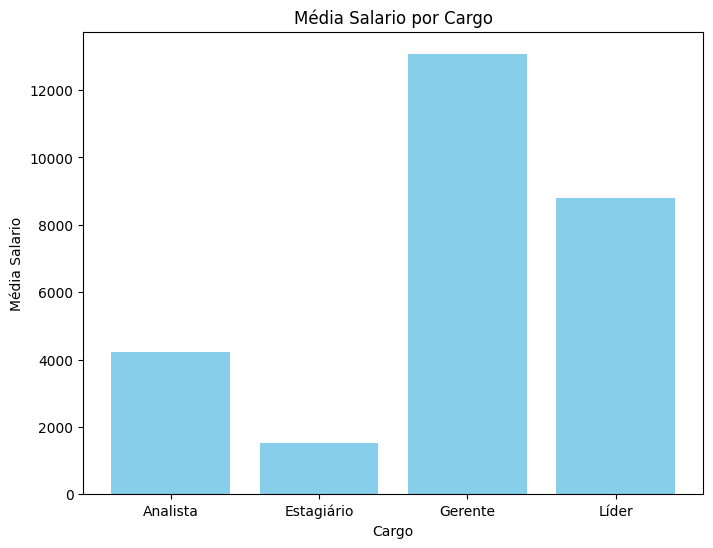

In [119]:
# Plotagem
plt.figure(figsize=(8, 6))
plt.bar(media_cargo['Cargo'], media_cargo['Salario'], color='skyblue')
plt.title('Média Salario por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Média Salario')

plt.ticklabel_format(style='plain', axis='y')

plt.savefig('grafico_salarios.png')
plt.show()

### Exercício 2: Expressões Regulares e JSON

In [66]:
import re
import json
from pathlib import Path

In [120]:
print("\n>>> Iniciando Exercício 2")
texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"


>>> Iniciando Exercício 2


In [121]:
padrao = r'Nome: ([\w\s]+?), Email: ([\w\.-]+@[\w\.-]+)'
correspondencias = re.findall(padrao, texto)

In [122]:
lista_dados = []
for nome, email in correspondencias:
    lista_dados.append({"nome": nome.strip(), "email": email})

saida = Path("dados_extraidos.json")
with saida.open("w", encoding = "utf-8") as f:
    json.dump(lista_dados, f, ensure_ascii=False, indent=2)

print(f'JSON gerado: {lista_dados}')

JSON gerado: [{'nome': 'Ana', 'email': 'ana@email.com'}, {'nome': 'João', 'email': 'joao@email.com'}]


### Exercício 3 – Geradores, Otimização e Banco de Dados

In [129]:
import pandas as pd
import sqlite3


In [130]:
print("\n>>> Iniciando Exercício 3")
df = pd.read_excel("loja.xlsx", sheet_name="CLIENTE")

con = sqlite3.connect("usuarios.db")


df.to_sql('CLIENTE', con, if_exists = 'replace', index=False)


todos_dados = pd.read_sql_query("SELECT * FROM  CLIENTE", con)
print('Todos os dados')
print(todos_dados)

sexo_fem = pd.read_sql_query("SELECT * FROM CLIENTE WHERE Sexo = 'f';", con)
print(f'\nRegistros encontrados (Feminino): \n{sexo_fem}')

con.close()

sexo_fem.to_excel("consulta_sexo_fem.xlsx", index=False)
print("\nExcel exportado com sucesso.")


>>> Iniciando Exercício 3
Todos os dados
   Idcliente       Nome Sobrenome Sexo                              Email
0          1   Deivison     Silva    m          deivisonsilva@hotmail.com
1          2     Shiryu  da Chuva    m  shiryu@cavaleirosdoszoodiacos.com
2          3   Carolina       Liz    f              carol_liz@hotmail.com
3          4      Drogo    Trones    m        drogogameoftrones@gmail.com
4          5   Malévola    Disney    f                malevola@disney.com
5          6  Guilherme  Patriota    m                guilherme@gmail.com
6          7     Marina    Santos    f                  marina@pop.com.br
7          8   Deivison   Andrade    m                 teste@teste.com.br

Registros encontrados (Feminino): 
   Idcliente      Nome Sobrenome Sexo                  Email
0          3  Carolina       Liz    f  carol_liz@hotmail.com
1          5  Malévola    Disney    f    malevola@disney.com
2          7    Marina    Santos    f      marina@pop.com.br

Excel expor